<a href="https://colab.research.google.com/github/abhiram-gorla/UNET--Nuclei-Segmentation-for-Histopathology-images/blob/master/UNET_Nuclei_Segmentation_for_Histopathology_images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import os 
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose,Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import backend as K


forming numpy array out of data set given



*  reading validation
data and its labels

*  reading train data and its labels

*   reading test data and its labels




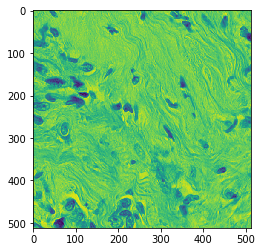

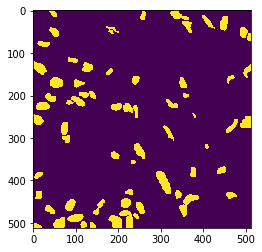

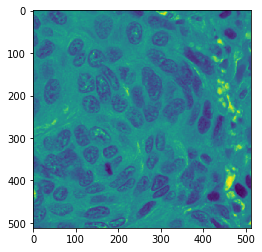

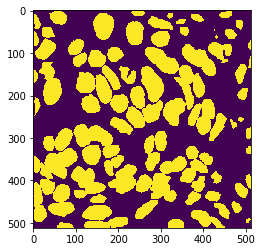

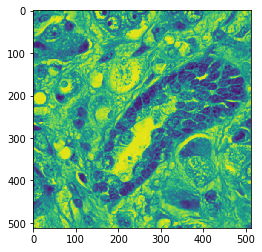

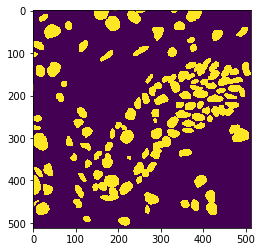

(512, 512)

In [0]:
data_train=[]
data_train_label=[]
data_test=[]
data_test_label=[]
data_val=[]
data_val_label=[]
def reading_data():
  for f in os.listdir("train"):                         #loading training data
    a=cv2.imread(os.getcwd()+'\\train\\'+f,0)
    data_train.append(a)
  for f in os.listdir("train_labels"):                #loading training_labels data
    a=cv2.imread(os.getcwd()+'\\train_labels\\'+f,0)
    data_train_label.append(a)
  for f in os.listdir("test"):                         #loading test data
    a=cv2.imread(os.getcwd()+'\\test\\'+f,0)
    data_test.append(a)
  for f in os.listdir("test_gt"):                         #loading test labels data
    a=cv2.imread(os.getcwd()+'\\test_gt\\'+f,0)
    data_test_label.append(a)
  for f in os.listdir("val"):                         #loading training dataa
    a=cv2.imread(os.getcwd()+'\\val\\'+f,0)
    data_val.append(a)
  for f in os.listdir("val_labels"):                         #loading training dataa
    a=cv2.imread(os.getcwd()+'\\val_labels\\'+f,0)
    data_val_label.append(a)
reading_data()
plt.imshow(data_test[0])
plt.show()
plt.imshow(data_test_label[0])
plt.show()
plt.imshow(data_train[0])
plt.show()
plt.imshow(data_train_label[0])
plt.show()
plt.imshow(data_val[0])
plt.show()
plt.imshow(data_val_label[0])
plt.show()
np.shape(data_test[0])

formation of numpy array is done 



model


In [0]:
def get_unet():
    inputs = Input((512,512,1))
    s = Lambda(lambda x: x / 255) (inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [0]:
unet_model=get_unet()

In [0]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [0]:
with tf.device('/device:GPU:0'):
  model=unet_model.fit(data_train,data_train_label,validation_data=(data_val,data_val_label))

ValueError: ignored